### Student Information
Name: Wei-Fang Liu 劉維方

Student ID: 1121092S

GitHub ID: anpanvann

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

### Begin Assignment Here

### I. Take Home Exercises

#### 1. Data and 2. Data Prep

In [1]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

#### 3. Data Transformation 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

##### Exercise 2 (take home)
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [3]:
# Answer here
# query by category name
X[X['category_name'] == 'sci.med']

,text,category,category_name
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med
16,"From: texx@ossi.com (Robert ""Texx"" Woodworth) ...",2,sci.med
28,From: rind@enterprise.bih.harvard.edu (David R...,2,sci.med
...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med


In [4]:
# query by if the text contains the word 'health' in the text
X[X['text'].str.contains('health', case=False)]

,text,category,category_name
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med
54,From: ls8139@albnyvms.bitnet (larry silverberg...,2,sci.med
56,From: kaminski@netcom.com (Peter Kaminski) Sub...,2,sci.med
66,From: paj@uk.co.gec-mrc (Paul Johnson) Subject...,2,sci.med
77,From: dmp1@ukc.ac.uk (D.M.Procida) Subject: Re...,2,sci.med
...,...,...,...
2130,From: mmm@cup.portal.com (Mark Robert Thorson)...,2,sci.med
2186,Subject: Re: Can't Breathe -- Update From: RGI...,2,sci.med
2199,From: romdas@uclink.berkeley.edu (Ella I Baff)...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med


In [5]:
categories_to_filter = ['alt.atheism', 'comp.graphics']
X[X['category_name'].isin(categories_to_filter)]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
11,From: amjad@eng.umd.edu (Amjad A Soomro) Subje...,1,comp.graphics
12,From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...,0,alt.atheism
13,Subject: So what is Maddi? From: madhaus@netco...,0,alt.atheism
...,...,...,...
2237,From: datepper@phoenix.Princeton.EDU (David Aa...,0,alt.atheism
2241,From: dls@aeg.dsto.gov.au (David Silver) Subje...,1,comp.graphics
2242,From: Sean McMains <mcmains@unt.edu> Subject: ...,1,comp.graphics
2248,"From: ""danny hawrysio"" <danny.hawrysio@canrem....",1,comp.graphics


#### 4. Data Mining using Pandas

In [6]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [7]:
print(sum(X.duplicated('text')))
print("since there is no duplicated text, i'll skip the dropping step")

0
since there is no duplicated text, i'll skip the dropping step


##### Exercise 5 (take home)

There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.

$Hint$: why .isnull() didn't work?

In [8]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [9]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

##### `Answer here`

missing value does not work in the following examples:

- row C: contains a *`string`* 'NaN', which is not automatically recognized as a missing value due to its `type`
- row D: contains a *`string`* 'None', which is not automatically recognized as a missing value due to its `type`
- row F: contains an empty *`string`*

missing value works in row A, B, and E
- Pandas can recognize `np.nan` or `None` objects as missing values
- columns that do not have any entry are also missing values

#### 5. Data Preprocessing

In [10]:
print(X.shape)
X_sample = X.sample(n=1000,random_state=42) #random state
print(X_sample.shape)

(2257, 3)
(1000, 3)


##### Exercise 6 (take home):

Notice any changes from the X dataframe to the X_sample dataframe? What are they? Report every change you noticed as compared to the previous state of X. Feel free to query and look more closely at the dataframe for these changes.

In [11]:
# Answer here (focus on shape and distribution)

print(X.shape, X_sample.shape)

print('\nX category distribution in percentage')
print(X.category_name.value_counts(normalize=True)*100)

print('\nX_sample category distribution in percentage')
print(X_sample.category_name.value_counts(normalize=True)*100)

(2257, 3) (1000, 3)

X category distribution in percentage
category_name
soc.religion.christian    26.539654
sci.med                   26.318121
comp.graphics             25.875055
alt.atheism               21.267169
Name: proportion, dtype: float64

X_sample category distribution in percentage
category_name
sci.med                   27.7
soc.religion.christian    27.0
comp.graphics             24.7
alt.atheism               20.6
Name: proportion, dtype: float64


difference in shape
- X is a 2257 x 3 dataframe, X_sample's dimension is 1000 x 3

difference in distribution
- the distribution among 4 kinds of categories looks about the same

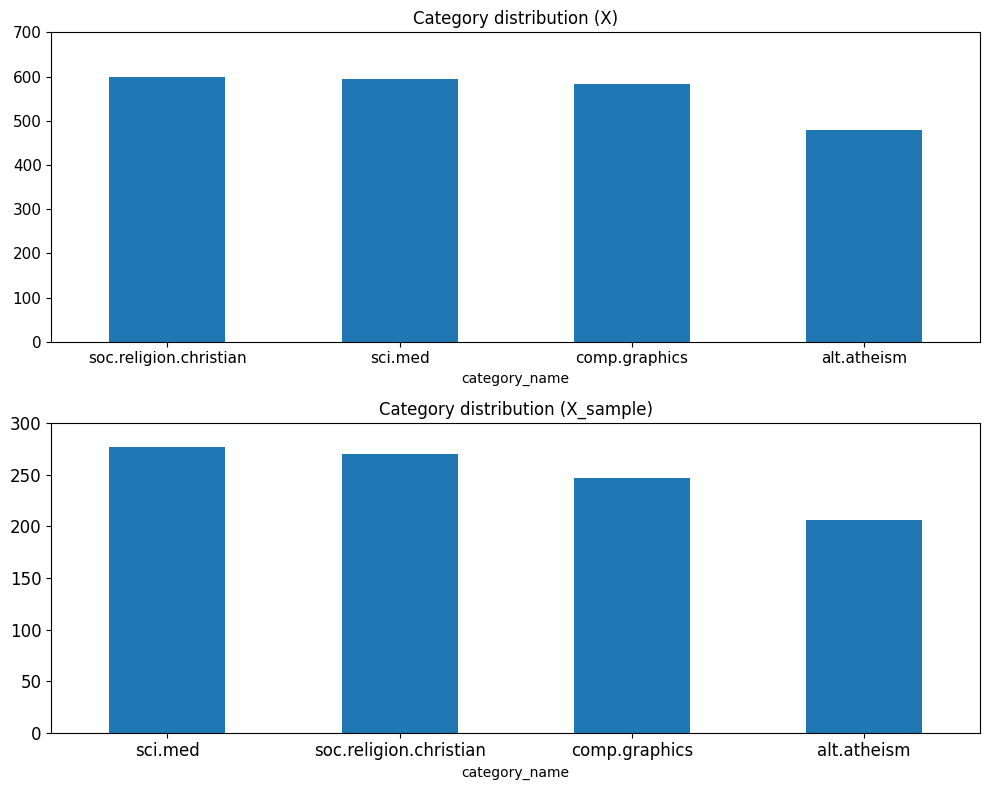

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

X.category_name.value_counts().plot(kind='bar',
                                    title='Category distribution (X)',
                                    ylim=[0, 700],        
                                    rot=0, fontsize=11, ax=axes[0])

X_sample.category_name.value_counts().plot(kind='bar',
                                           title='Category distribution (X_sample)',
                                           ylim=[0, 300], 
                                           rot=0, fontsize=12, ax=axes[1])

plt.tight_layout()
plt.show()

##### Exercise 8 (take home):

We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for.

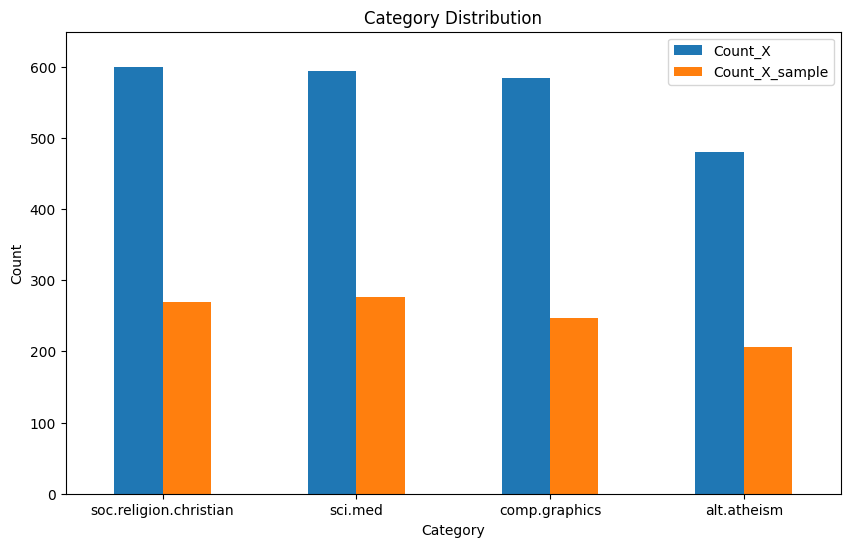

In [13]:
upper_bound = max(max(X.category_name.value_counts()), max(X_sample.category_name.value_counts())) + 50

X_count = X.category_name.value_counts()
X_sample_count = X_sample.category_name.value_counts()

Xcount_df = pd.DataFrame({'Category': X_count.index, 'Count': X_count.values})
Xsample_df = pd.DataFrame({'Category': X_sample_count.index, 'Count': X_sample_count.values})

merged = pd.merge(Xcount_df, Xsample_df, on='Category', suffixes=('_X', '_X_sample'))

ax = merged.plot(kind='bar', x='Category', figsize=(10, 6))
ax.set_ylim(0, upper_bound)
ax.set_ylabel('Count')
ax.set_title('Category Distribution')

plt.xticks(rotation=0)
plt.show()

In [14]:
import nltk
nltk.download('punkt')

# Tokenization
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

from sklearn.feature_extraction.text import CountVectorizer

# Vectorization
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts.shape)

analyze = count_vect.build_analyzer()

[nltk_data] Downloading package punkt to /Users/vvn/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


(2257, 35788)


##### Exercise 10 (take home):

We said that the 1 at the beginning of the fifth record represents the 00 term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [15]:
arr = X_counts[4:5, 0:100].toarray()

indices = np.where(arr == 1)

indices_col = indices[1]
feature_names = count_vect.get_feature_names_out()

selected_features = [feature_names[i:(i+1)] for i in indices_col]

print(selected_features)

[array(['00'], dtype=object), array(['01'], dtype=object)]


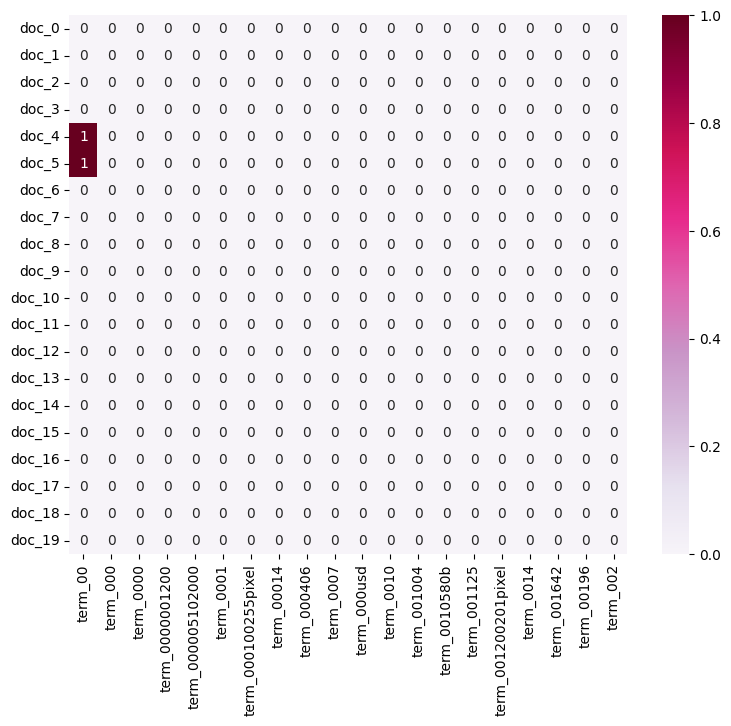

In [16]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, 0:20].toarray()

import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

##### Exercise 11 (take home):

From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of 1 in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

- `Choose Terms to Present Based on Frequency`: 
    Terms that have the highest total frequencies across all documents are often more informative than very rare terms, so the visualization would be more helpful if we prioritize these 


- `Dimensionality Reduction`: 
    Techniques like PCA to reduce the dimension of the term-document matrix and visualize it in 2D or 3D space.

- `Aggregation`:
    Instead of visualizing individual terms, group terms into meaningful clusters or topics and visualize the distribution of these topics across documents.

##### Dimensionality Reduction

dimetion before reduction (2257, 35788)
dimention after PCA reduction (2257, 2)


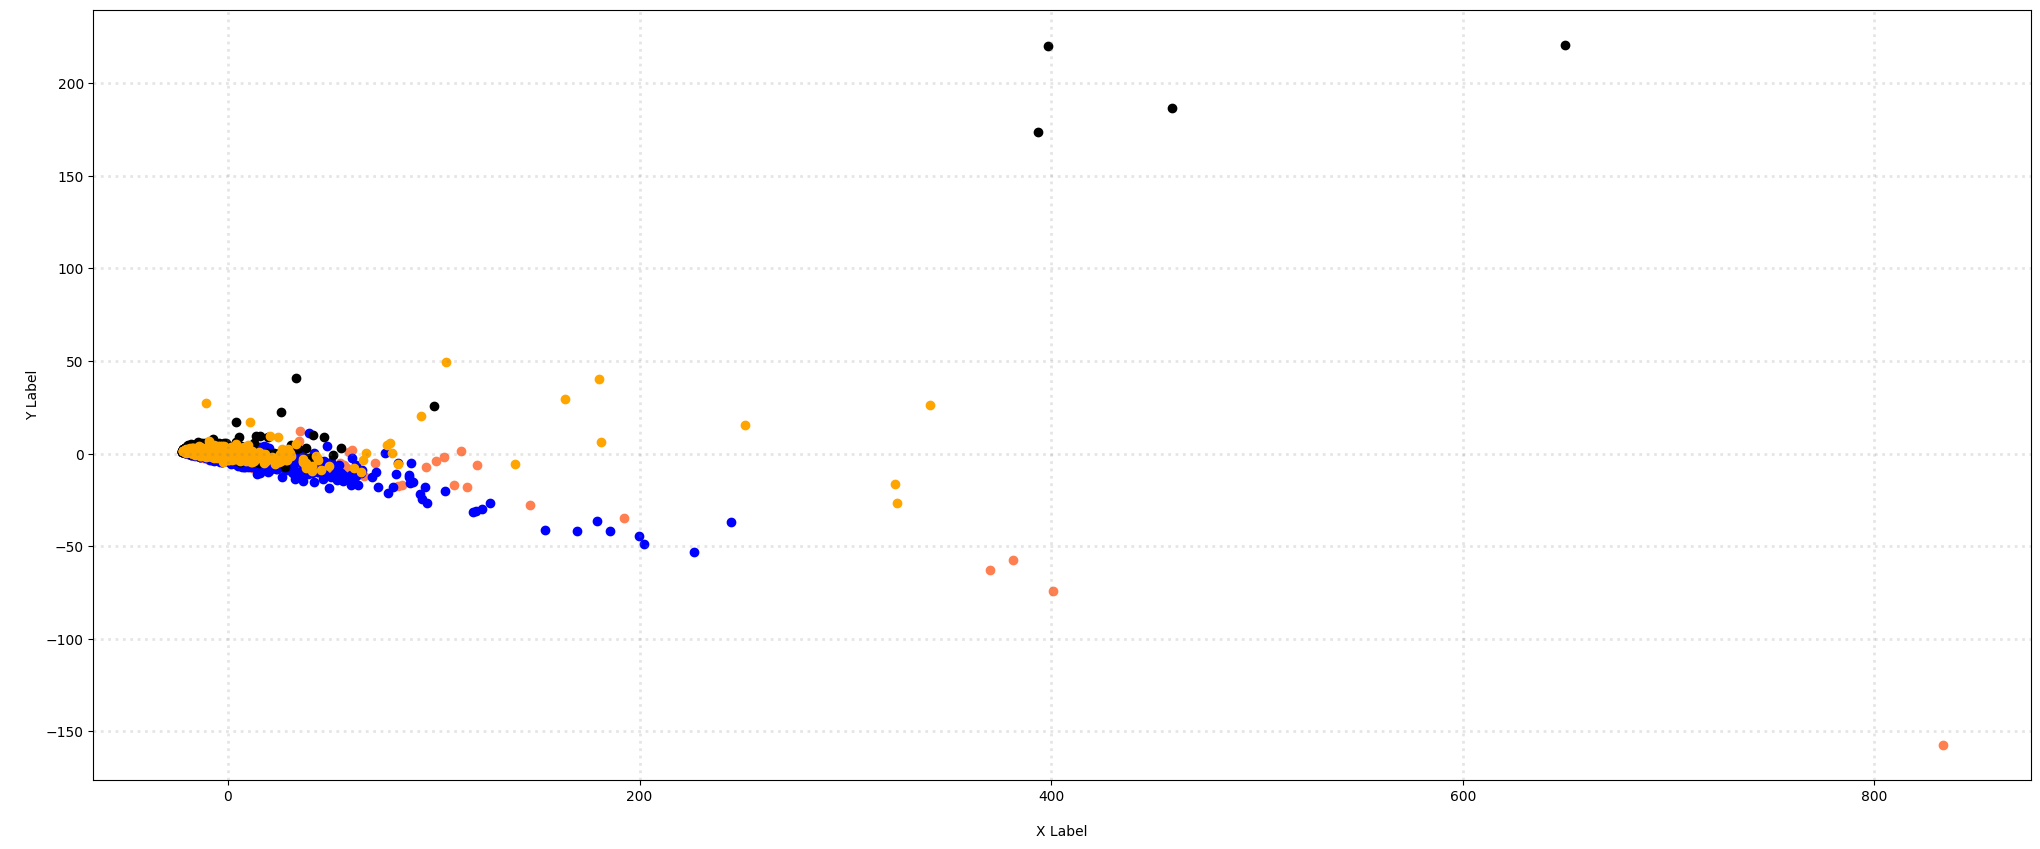

In [17]:
from sklearn.decomposition import PCA
print(f"dimetion before reduction {X_counts.shape}")
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
print(f"dimention after PCA reduction {X_reduced.shape}")

col = ['coral', 'blue', 'black', 'orange']

fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

##### Exercise 12 (take home):

Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hin5$: you can refer to Axes3D in the documentation.

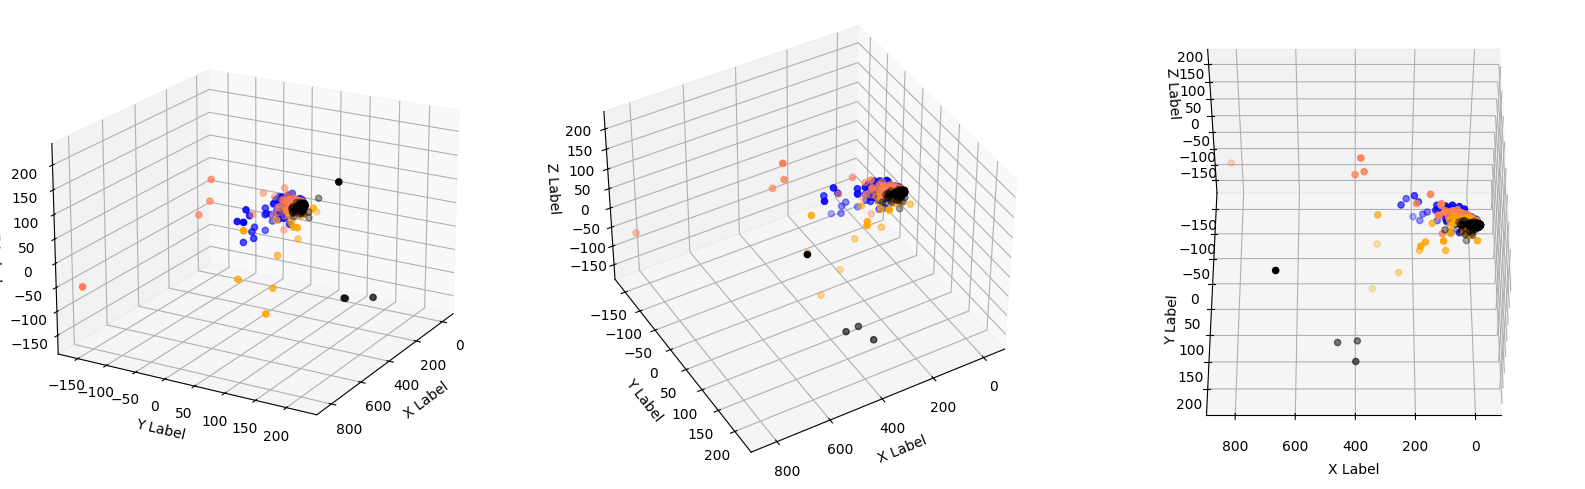

In [18]:
# answer here

# reduce dimensionality to 3
X_reduced_3D = PCA(n_components=3).fit_transform(X_counts.toarray())

fig, axes = plt.subplots(1, 3, figsize=(20, 6), subplot_kw={'projection': '3d'})

# 3 different angles for different visualization
angles = [(20, 30), (40, 60), (50, 90)]

for i, ax in enumerate(axes):
    for c, category in zip(col, categories):
        xs = X_reduced_3D[X['category_name'] == category].T[0]
        ys = X_reduced_3D[X['category_name'] == category].T[1]
        zs = X_reduced_3D[X['category_name'] == category].T[2]
       
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.view_init(elev=angles[i][0], azim=angles[i][1])

# plt.tight_layout()
plt.show()

##### Attribute Transformation / Aggregation

In [19]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [ ]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])

##### Exercise 13 (take home):

If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [ ]:
import plotly.graph_objects as go
import plotly.io as pio

pio.renderers.default = 'notebook'

In [ ]:
# Answer here

# top 30 term_frequency 

data = {'Term': count_vect.get_feature_names_out(), 
        'Frequency': term_frequencies}
df = pd.DataFrame(data)

freq_sorted = df.sort_values(by='Frequency', ascending=False)
freq_sorted.reset_index(drop=True, inplace=True)

top_features = freq_sorted[:30]

fig = go.Figure(data=[go.Bar(x=top_features['Term'], y=top_features['Frequency'])])

fig.update_layout(
    title='Top 30 Terms by Frequency (All Data)',
    xaxis=dict(title='Term'),
    yaxis=dict(title='Frequency'),
)

fig.show()

##### Exercise 14 (take home):

The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise.

- We can efficiently reduce the number of terms to visualize by filtering out terms with low frequencies, and to do so we can set a threshold value of frequencies.

In [ ]:
# Filter out terms with low frequency
threshold = 100
df_filtered = df[df['Frequency'] > threshold]

# No sorting step here. Directly take the top N terms
N = 100
top_terms = df_filtered.iloc[:N]

fig = go.Figure(data=[go.Bar(x=top_terms['Term'], y=top_terms['Frequency'])])
fig.update_layout(
    title=f'Top {N} Terms With Frequency over {threshold}',
    xaxis=dict(title='Term'),
    yaxis=dict(title='Frequency'),
)

fig.show()

##### Exercise 15 (take home):

Additionally, you can attempt to sort the terms on the x-axis by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called long tail (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

In [ ]:
# Answer here

threshold = 100
df_filtered = df[df['Frequency'] > threshold]

# Sort the terms by frequency
freq_filtered_sorted = df_filtered.sort_values(by='Frequency', ascending=False)
freq_filtered_sorted.reset_index(drop=True, inplace=True)

# Limit to top 150 terms
N = 150
top_terms = freq_filtered_sorted.iloc[:N]

fig = go.Figure(data=[go.Bar(x=top_terms['Term'], y=top_terms['Frequency'])])
fig.update_layout(
    title=f'Top {N} Terms With Frequency over {threshold}',
    xaxis=dict(title='Term'),
    yaxis=dict(title='Frequency'),
)

fig.show()

##### Log Distribution

In [ ]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])

In [ ]:
data = {'Term': count_vect.get_feature_names_out()[:300], 
        'Frequency': term_frequencies_log[:300]}
df = pd.DataFrame(data)

freq_sorted = df.sort_values(by='Frequency', ascending=False)
freq_sorted = freq_sorted[freq_sorted['Frequency'] > 0.0]
freq_sorted.reset_index(drop=True, inplace=True)

plt.figure(figsize=(100, 10))

g = sns.barplot(x=freq_sorted['Term'], y=freq_sorted['Frequency'])
g.set_xticklabels(freq_sorted['Term'], rotation=90)

plt.show()

##### Discretization and Binarization

In [ ]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
X['bin_category'] = mlb.transform(X['category']).tolist()

##### Exercise 16 (take home):

Try to generate the binarization using the category_name column instead. Does it work?

In [ ]:
# Answer here

mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

LabelBinarizer() can handle different types of input and therefore it can work on both `category` and `category_name` to present them as binary vector

### II. New Data Preperation

In [ ]:
import pandas as pd
import os
import numpy as np

# import data and combine them into a DataFrame

folder = 'data'
files = [f for f in os.listdir(folder) if f.endswith('_labelled.txt')]

text_score = pd.DataFrame()

for f in files:
    dataset = os.path.splitext(f)[0].replace('_labelled', '') 
    filepath = os.path.join(folder, f)
    
    text_entries = []
    scores = []
    
    with open(filepath, 'r', encoding='utf-8') as file:
        for line in file:
            parts = line.strip().split('\t')
            if len(parts) == 2:
                text, score = parts
                text_entries.append(text)
                scores.append(int(score))
    
    data = pd.DataFrame({'text': text_entries, 'score': scores})
    data['source'] = dataset
    text_score = pd.concat([text_score, data], ignore_index=True)

text_score.head(10)

In [ ]:
# check if there's missing values

import helpers.data_mining_helpers as dmh

text_score.isnull().apply(lambda x: dmh.check_missing_values(x))

In [ ]:
# check if there's duplicated entry

print(sum(text_score.duplicated('text')))

duplicates = text_score.duplicated(subset=['text', 'score'], keep=False)
duplicate_entries = text_score[duplicates].sort_values(by=['text'])
duplicate_entries

In [ ]:
text_score_unique = text_score.drop_duplicates(subset=['text', 'score'])
print(f"{text_score.shape[0] - text_score_unique.shape[0]} duplicated entries are dropped")
print(f"the number of entries reduced from {text_score.shape[0]} to {text_score_unique.shape[0]}")

In [ ]:
# samping from the data set

print(text_score_unique.shape)
text_score_sample = text_score_unique.sample(n=1000,random_state=42) #random state
text_score_sample

In [ ]:
# compare the original and the random-sampled set

print('\nOriginal Data score distribution in percentage')
print(text_score_unique.score.value_counts(normalize=True)*100)

print('\nSampling Data score distribution in percentage')
print(text_score_sample.score.value_counts(normalize=True)*100)
# shape, distribution

In [ ]:
import matplotlib.pyplot as plt

upper_bound = max(max(text_score_unique.score.value_counts()), max(text_score_sample.score.value_counts())) + 40

X_count = text_score_unique.score.value_counts()
X_sample_count = text_score_sample.score.value_counts()

Xcount_df = pd.DataFrame({'Category': X_count.index, 'Count': X_count.values})
Xsample_df = pd.DataFrame({'Category': X_sample_count.index, 'Count': X_sample_count.values})

merged = pd.merge(Xcount_df, Xsample_df, on='Category', suffixes=('_X', '_X_sample'))

ax = merged.plot(kind='bar', x='Category', figsize=(9, 4))
ax.set_ylim(0, upper_bound)
ax.set_ylabel('Count')
ax.set_title('Category Distribution')
plt.xticks(rotation=0)
plt.show()

plt.tight_layout()
plt.show()

##### Feature Creation

In [ ]:
import nltk
nltk.download('punkt')

text_score_unique['unigrams'] = text_score_unique['text'].apply(lambda x: dmh.tokenize_text(x))
text_score_unique.head()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

TS_count_vect = CountVectorizer()
TS_count = TS_count_vect.fit_transform(text_score_unique.text) # learn the vocabulary and return document-term matrix
TS_count.shape

In [ ]:
analyze = TS_count_vect.build_analyzer()
print(text_score_unique.text[0])
analyze(text_score_unique.text[0])

In [ ]:
plot_x = ["term_"+str(i) for i in TS_count_vect.get_feature_names_out()[345:380]]
plot_y = ["doc_"+ str(i) for i in list(text_score_unique.index)[360:380]]
plot_z = TS_count[360:380, 345:380].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)


In [ ]:
import seaborn as sns

plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

##### Dimentionality Reduction

In [ ]:
from sklearn.decomposition import PCA

print(TS_count.shape)
TS_reduced = PCA(n_components = 2).fit_transform(TS_count.toarray())
print(TS_reduced.shape)

In [ ]:
categories = text_score_unique.source.unique()
categories

In [ ]:
col = ['#FF6F61', '#5E81AC', '#A3BE8C']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = TS_reduced[text_score_unique['source'] == category].T[0]
    ys = TS_reduced[text_score_unique['source'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlim(-2, 7)
ax.set_ylim(-2.5, 2.1)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=col[i], edgecolor='k', label=categories[i]) for i in range(len(categories))]
ax.legend(handles=legend_elements)

plt.show()

In [ ]:
TS_reduced_3D = PCA(n_components=3).fit_transform(TS_count.toarray())

fig, axes = plt.subplots(1, 3, figsize=(20, 6), subplot_kw={'projection': '3d'})

# 3 different angles for different visualization
angles = [(20, 30), (10, 250), (10, -70)]

for i, ax in enumerate(axes):
    for c, category in zip(col, categories):
        xs = TS_reduced_3D[text_score_unique['source'] == category].T[0]
        ys = TS_reduced_3D[text_score_unique['source'] == category].T[1]
        zs = TS_reduced_3D[text_score_unique['source'] == category].T[2]
       
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.set_xlim([-0.5, 7.5])
    ax.set_ylim(-2.5, 2.1)
    ax.set_zlim([-5, 2.4])
    ax.view_init(elev=angles[i][0], azim=angles[i][1])

plt.tight_layout()
plt.show()

##### Attribute Transformation / Aggregation

In [ ]:
term_frequencies_new = []
print(TS_count.shape[1])
for j in range(0, TS_count.shape[1]):
    term_frequencies_new.append(sum(TS_count[:,j].toarray()))

In [ ]:
term_frequencies_new = np.asarray(TS_count.sum(axis=0))[0]

In [ ]:
terms = TS_count_vect.get_feature_names_out()[:10]
frequencies = term_frequencies_new[:10]

# Loop through and print each term with its frequency
for term, freq in zip(terms, frequencies):
    print(f"Term: {term}, Frequency: {freq}")

In [ ]:
data = {'Term': TS_count_vect.get_feature_names_out(), 
        'Frequency': term_frequencies_new}
df = pd.DataFrame(data)

freq_sorted = df.sort_values(by='Frequency', ascending=False)
freq_sorted.reset_index(drop=True, inplace=True)

top_features = freq_sorted[:200]

import plotly.graph_objects as go

fig = go.Figure(data=[go.Bar(x=top_features['Term'], y=top_features['Frequency'])])

fig.update_layout(
    title='Top 200 Terms by Frequency',
    xaxis=dict(title='Term'),
    yaxis=dict(title='Frequency'),
)

##### Log Distribution

In [ ]:
import math
term_frequencies_log_new = [math.log(i) for i in term_frequencies_new]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=TS_count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log_new[:300])

In [ ]:
data_new = {'Term': TS_count_vect.get_feature_names_out()[:300], 
        'Frequency': term_frequencies_log_new[:300]}
df_new = pd.DataFrame(data_new)

freq_sorted = df_new.sort_values(by='Frequency', ascending=False)
freq_sorted = freq_sorted[freq_sorted['Frequency'] > 0]
freq_sorted.reset_index(drop=True, inplace=True)

plt.figure(figsize=(100, 10))

g = sns.barplot(x=freq_sorted['Term'], y=freq_sorted['Frequency'])
g.set_xticklabels(freq_sorted['Term'], rotation=90)

plt.show()

##### Discretization and Binarization

In [ ]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [ ]:
text_score_unique.source

In [ ]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(text_score_unique.source)

In [ ]:
text_score_unique['binary_category'] = mlb.transform(text_score_unique['source']).tolist()

In [ ]:
text_score_unique.head(10)

##### Data Exploration

In [ ]:
# numarize difference between sentences

# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = text_score_unique.iloc[50]
random_record_1 = random_record_1['text']
print(random_record_1)
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = text_score_unique.iloc[100]
random_record_2 = random_record_2['text']
print(random_record_2)
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = text_score_unique.iloc[150]
random_record_3 = random_record_3['text']
print(random_record_3)
document_to_transform_3.append(random_record_3)

In [ ]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = TS_count_vect.transform(document_to_transform_1)
document_vector_count_2 = TS_count_vect.transform(document_to_transform_2)
document_vector_count_3 = TS_count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

### III. Visualization, TF-IDF and Naive Bayes classifier 

#### Visualization 

Generate meaningful new data visualizations. Refer to online resources and the Data Mining textbook for inspiration and ideas.

##### WordCloud 

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
text_data = " ".join(text_score_unique['text'].astype(str))

wordcloud = WordCloud(width = 1200, height = 600, 
                background_color ='white', 
                stopwords = set(STOPWORDS), 
                min_font_size = 10).generate(text_data)

# Plot the word cloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

##### Text Length Distribution 

In [ ]:
text_length = [len(text.split()) for text in text_score_unique['text']]

plt.figure(figsize=(10, 5))
plt.hist(text_length, bins=50)
plt.title('Text Length Distribution')
plt.xlabel('Text Length (in words)')
plt.ylabel('Number of Entries')
plt.show()

##### Bigram by Frequency

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

bigram_vectorizer = CountVectorizer(ngram_range=(2, 2))
bigram_counts = bigram_vectorizer.fit_transform(text_score_unique['text'])

In [ ]:
bigram_term_frequencies = np.asarray(bigram_counts.sum(axis=0))[0]

In [ ]:
bigram_data = {
    'Bigrams': bigram_vectorizer.get_feature_names_out(),
    'Frequency': bigram_term_frequencies
}
bigram_df = pd.DataFrame(bigram_data).sort_values(by='Frequency', ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=bigram_df['Frequency'], y=bigram_df['Bigrams'])
plt.title('Top 20 Bigrams by Frequency')
plt.show()

##### Trigram by Frequency

In [ ]:
trigram_vectorizer = CountVectorizer(ngram_range=(3, 3))
trigram_counts = trigram_vectorizer.fit_transform(text_score_unique['text'])
trigram_term_frequencies = np.asarray(trigram_counts.sum(axis=0))[0]

In [ ]:
trigram_data = {
    'Trigrams': trigram_vectorizer.get_feature_names_out(),
    'Frequency': trigram_term_frequencies
}
trigram_df = pd.DataFrame(trigram_data).sort_values(by='Frequency', ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=trigram_df['Frequency'], y=trigram_df['Trigrams'])
plt.title('Top 20 Trigrams by Frequency')
plt.show()

#### TF-IDF

Generate TF-IDF features from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn guide .

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(text_score_unique['text'])

In [ ]:
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [ ]:
doc_tfidf = df_tfidf.iloc[0].sort_values(ascending=False).head(20)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x=doc_tfidf.values, y=doc_tfidf.index)
plt.title('Top 20 terms by TF-IDF score in the first document')
plt.show()

#### Naive Bayes Classifier

Implement a simple Naive Bayes classifier that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Assuming text_data contains your documents and labels contains the respective labels
text_data = text_score_unique['text']
score_data = text_score_unique['score']
X_train, X_test, y_train, y_test = train_test_split(text_data, score_data, test_size=0.2, random_state=42)

# For word frequency features
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
X_test_counts = count_vect.transform(X_test)

# For TF-IDF features 
tfidf_vect = TfidfVectorizer()
X_train_tfidf = tfidf_vect.fit_transform(X_train)
X_test_tfidf = tfidf_vect.transform(X_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score

##### TF-IDF Features

In [ ]:
mnb = MultinomialNB()
y_pred_mnb_tfidf = mnb.fit(X_train_tfidf, y_train).predict(X_test_tfidf)
accuracy_mnb_tfidf = accuracy_score(y_test, y_pred_mnb_tfidf)
print(f"Accuracy using TF-IDF features with MultinomialNB: {accuracy_mnb_tfidf:.2f}")

gnb = GaussianNB()
y_pred_gnb_tfidf = gnb.fit(X_train_tfidf.toarray(), y_train).predict(X_test_tfidf.toarray())
accuracy_gnb_tfidf = accuracy_score(y_test, y_pred_gnb_tfidf)
print(f"Accuracy using TF-IDF features with GaussianNB: {accuracy_gnb_tfidf:.2f}")

bnb = BernoulliNB()
y_pred_bnb_tfidf = bnb.fit(X_train_tfidf, y_train).predict(X_test_tfidf)
accuracy_bnb_tfidf = accuracy_score(y_test, y_pred_bnb_tfidf)
print(f"Accuracy using TF-IDF features with BernoulliNB: {accuracy_bnb_tfidf:.2f}")


- we see that GaussianNB has the lowest accuracy, while MultinomialNB and BernoulliNB have higher 

In [ ]:
from sklearn.metrics import classification_report

print("MultinomialNB with TF-IDF features:\n")
print(classification_report(y_test, y_pred_mnb_tfidf))

print("\nBernoulliNB with TF-IDF features:\n")
print(classification_report(y_test, y_pred_bnb_tfidf))

- their performances are pretty similar

##### Word Frequency Features

In [ ]:
mnb_freq = MultinomialNB()
y_pred_mnb_counts = mnb_freq.fit(X_train_counts, y_train).predict(X_test_counts)
accuracy_mnb_counts = accuracy_score(y_test, y_pred_mnb_counts)
print(f"Accuracy using word frequency features with MultinomialNB: {accuracy_mnb_counts:.2f}")

gnb_freq = GaussianNB()
y_pred_gnb_counts = gnb_freq.fit(X_train_counts.toarray(), y_train).predict(X_test_counts.toarray())
accuracy_gnb_counts = accuracy_score(y_test, y_pred_gnb_counts)
print(f"Accuracy using word frequency features with GaussianNB: {accuracy_gnb_counts:.2f}")

bnb_freq = BernoulliNB()
y_pred_bnb_counts = bnb_freq.fit(X_train_counts, y_train).predict(X_test_counts)
accuracy_bnb_counts = accuracy_score(y_test, y_pred_bnb_counts)
print(f"Accuracy using word frequency features with BernoulliNB: {accuracy_bnb_counts:.2f}")

- GaussianNB has the lowest accuracy again, and MultinomialNB has the highest

In [ ]:
from sklearn.metrics import classification_report

print("MultinomialNB with Frequency features:\n")
print(classification_report(y_test, y_pred_mnb_counts))

print("\nBernoulliNB with Frequency features:\n")
print(classification_report(y_test, y_pred_bnb_counts))

- MultinomialNB performs slightly better than BernoulliNB with Frequency features

##### Model Testing and Comparsion

In [ ]:
def predict_category_tfidf(text):

    transformed_text = tfidf_vect.transform([text])
    prediction = mnb.predict(transformed_text)

    return prediction[0]

# Test the function with TF-IDF features 
sentences_to_test = ["I enjoy this movie",
                     "The plot was predictable",
                     "The graphics were breathtaking",
                     "The acting was subpar",
                     "A must-watch for everyone",
                     "It was a waste of time"]

results = [(sentence, predict_category_tfidf(sentence)) for sentence in sentences_to_test]
pd.DataFrame(results, columns=['Input Text', 'Score'])

In [ ]:
def predict_category_count_features(text):
    transformed_text = count_vect.transform([text])
    prediction = mnb_freq.predict(transformed_text)
    return prediction[0]

results = [(sentence, predict_category_count_features(sentence)) for sentence in sentences_to_test]
pd.DataFrame(results, columns=['Input Text', 'Score'])

Comparing the MultinomialNB model trained with `TF-IDF` or `Word Frequency` freatures, we first learned that their __accuracy score__ is pretty similar (0.8 to 0.81). I then test the model with some simple text input to evaluate, and noticed that the Word Frequency model cannot classify the sentence "The acting was subpar" correctly. 

- TF-IDF may have given a _higher weight_ to the word "subpar" if it appears in fewer documents in the seen data but is more characteristic of negative reviews.
- The Word Frequecny representation just counts occurrences. If, in the training set, the words "acting" and "was" frequently appeared in positive reviews, the model might lean towards classifying the sentence as positive despite the presence of the word "subpar" (may have fewer occurance).

In short, due to the fact that these two models are trained with different characteristics, they may end up with different result.

### IV. Improvements

In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets?

The main inefficient part when I was running the code is the part to compute for term frequency, and it is due to the fact that we have too many tokenized terms extracted from the dataset. We can improve this by adding more steps in the data preprocessing stage. 

1. __Noisy Data: Data Cleaning__

    For the first dataset, we start off tokenizing the text before we try to remove some unnecessary parts in the text. For example, in the first text entry 

    > From: sd345@city.ac.uk (Michael Collier)
    >
    > Subject: Converting images to HP LaserJet III?
    >
    > Nntp-Posting-Host: hampton
    >
    > Organization: The City University
    >
    > Lines: 14
    > 
    > Does anyone know of a good way (standard PC application/PD utility) to
    > convert tif/img/tga files into LaserJet III format.  We would also like to
    > do the same, converting to HPGL (HP plotter) files.
    > 
    > Please email any response.
    > 
    > Is this the correct group?
    > 
    > Thanks in advance.  Michael.
    > 
    > Michael Collier (Programmer)                 The Computer Unit,
    >
    > Email: M.P.Collier@uk.ac.city                The City University,
    > 
    > Tel: 071 477-8000 x3769                      London,
    >
    > Fax: 071 477-8565                            EC1V 0HB.

    Email addresses, phone numbers, fax numbers, and certain headers like `Nntp-Posting-Host` or `Lines` might not provide any meaningful information in many textual analyses. Including them might lead to overfitting if the model starts to associate particular numbers or email domains with specific outcomes.

 

2. __Words in Different Forms but Same Meaning__

    Different forms of a word can be treated as different tokens, and we can try to avoid this to make the data more concise. 

    We can apply __stemming__ to reduce words to their base or root form, reducing the dimensionality of the dataset.

3. __Vectorization: Parameter Tuning__ 

    For the vectorization with CountVectorizer and TfidfVectorizer, we use only the default parameters without exploration of others.

    We can try setting different parameters such as: 
    - `ngram_range` to capture phrases, 
    - `max_df` and `min_df` to filter out terms that appear too frequently or too rarely, 
    - `max_features` to limit the number of features.
    - `stop_words` to remove the stop words